In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
CURRENT_DIR = Path.cwd()
DATA_DIR = CURRENT_DIR / "data"

Load roster

In [3]:
roster = pd.read_csv(
    DATA_DIR / "roster.csv",
    converters={"NetID":str.lower,"Email Address":str.lower},
    usecols=["Section","Email Address","NetID"],
    index_col="NetID"
)

In [4]:
roster.head()

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2


Load HW and exam grade file

In [5]:
hw_exam_grades = pd.read_csv(
    DATA_DIR / "hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda x: "Submission" not in x,
    index_col="SID",
)

In [6]:
hw_exam_grades.head()

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100


Load quiz grades

In [7]:
quiz_grades = pd.DataFrame()
#A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.
# reading multiple csv files
for file_path in DATA_DIR.glob("quiz_*_grades.csv"):
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"],
    ).rename(columns={"Grade": quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [8]:
quiz_grades.head()

,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
Email,,,,,
richard.bennett@univ.edu,10,6,9,8,10
timothy.parker@univ.edu,9,14,13,14,10
carol.reyes@univ.edu,5,15,8,14,6
brooke.powers@univ.edu,6,10,17,10,8
michael.taylor@univ.edu,5,15,13,12,5


In [9]:
final_data = pd.merge(
    roster,
    hw_exam_grades,
    left_index=True,
    right_index=True,
)
#When set to True,
#it means that the indices of both DataFrames (roster and hw_exam_grades) will be used as the merging keys.

In [10]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100


In [11]:
final_data = pd.merge(
    final_data, quiz_grades, left_on="Email Address", right_index=True
)
final_data = final_data.fillna(0)

In [12]:
 final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


## Calculating Final grades

In [13]:
n_exams = 3
for n in range(1, n_exams + 1):
    final_data[f"Exam {n} Score"] = (
        final_data[f"Exam {n}"] / final_data[f"Exam {n} - Max Points"]
    )

In [14]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,4,10,11,7,10,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,8,10,10,13,6,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,8,6,14,9,4,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,8,8,8,13,5,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,6,14,11,7,7,0.96,0.80,0.86


In [15]:
#assumed heading were in order or use sorted
#find homework 1 or homework 11
homework_scores = final_data.filter(regex=r"^Homework \d\d?$", axis=1)
#find homework 1 - or homework 11 -
homework_max_points = final_data.filter(regex=r"^Homework \d\d? -", axis=1)

In [16]:
sum_of_hw_scores = homework_scores.sum(axis=1)
sum_of_hw_max = homework_max_points.sum(axis=1)
final_data["Total Homework"] = sum_of_hw_scores / sum_of_hw_max

In [17]:
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)
final_data["Average Homework"] = average_hw_scores / homework_scores.shape[1]

In [18]:
final_data["Homework Score"] = final_data[
    ["Total Homework", "Average Homework"]
].max(axis=1)


In [19]:
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 2,Quiz 3,Quiz 4,Quiz 5,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,11,7,10,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,10,13,6,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,14,9,4,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,8,13,5,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,11,7,7,0.96,0.80,0.86,0.782432,0.787742,0.787742


In [20]:
quiz_scores = final_data.filter(regex=r"^Quiz \d$", axis=1)
#find quiz 1 or quiz 2
quiz_max_points = pd.Series(
    {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
)

In [21]:
sum_of_quiz_scores = quiz_scores.sum(axis=1)
sum_of_quiz_max = quiz_max_points.sum()
final_data["Total Quizzes"] = sum_of_quiz_scores / sum_of_quiz_max

In [22]:
average_quiz_scores = (quiz_scores / quiz_max_points).sum(axis=1)
final_data["Average Quizzes"] = average_quiz_scores / quiz_scores.shape[1]

In [23]:
final_data["Quiz Score"] = final_data[
    ["Total Quizzes", "Average Quizzes"]
].max(axis=1)

weightings = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,
    }
)

final_data["Final Score"] = (final_data[weightings.index] * weightings).sum(
    axis=1
)
#round
final_data["Ceiling Score"] = np.ceil(final_data["Final Score"] * 100)

In [24]:
grades = {
    90: "A",
    80: "B",
    70: "C",
    60: "D",
    0: "F",
}


In [25]:
def grade_mapping(value):
    """Map numerical grade to letter grade."""
    for key, letter in grades.items():
        if value >= key:
            return letter


letter_grades = final_data["Ceiling Score"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=False
)

In [26]:
final_data['Final Grade']


wxb12345    C
mxl12345    B
txj12345    C
jgf12345    C
smj00936    C
           ..
pmj37756    B
dsl24347    C
nxe44872    C
bxr62103    C
jxw53347    C
Name: Final Grade, Length: 150, dtype: category
Categories (5, object): ['A', 'B', 'C', 'D', 'F']

In [27]:
#section-1,2,3 table -data
for section, table in final_data.groupby("Section"):
    section_file = DATA_DIR / f"Section {section} Grades.csv"
    num_students = table.shape[0]
    print(
        f"In Section {section} there are {num_students} students saved to "
        f"file {section_file}."
    )
    table.sort_values(by=["Last Name", "First Name"]).to_csv(section_file)


In Section 1 there are 56 students saved to file C:\Users\acer\Downloads\[RealPython] - Path - Pandas for Data Science\[RealPython] - Path - Pandas for Data Science\13.Using Pandas to Make a Gradebook in Python\data\Section 1 Grades.csv.
In Section 2 there are 51 students saved to file C:\Users\acer\Downloads\[RealPython] - Path - Pandas for Data Science\[RealPython] - Path - Pandas for Data Science\13.Using Pandas to Make a Gradebook in Python\data\Section 2 Grades.csv.
In Section 3 there are 43 students saved to file C:\Users\acer\Downloads\[RealPython] - Path - Pandas for Data Science\[RealPython] - Path - Pandas for Data Science\13.Using Pandas to Make a Gradebook in Python\data\Section 3 Grades.csv.


In [30]:
pd.read_csv(DATA_DIR / "Section 3 Grades.csv")

,Unnamed: 0,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,...,Exam 3 Score,Total Homework,Average Homework,Homework Score,Total Quizzes,Average Quizzes,Quiz Score,Final Score,Ceiling Score,Final Grade
0,bmb94857,belinda.bailey@univ.edu,3,Belinda,Bailey,60.0,80,74,80,55,...,0.87,0.822973,0.828187,0.828187,0.623188,0.614973,0.623188,0.785231,79.0,C
1,nsb43944,nathan.bates@univ.edu,3,Nathan,Bates,68.0,80,67,80,69,...,0.82,0.843243,0.843794,0.843794,0.652174,0.663489,0.663489,0.771064,78.0,C
2,mxb67936,michael.benton@univ.edu,3,Michael,Benton,54.0,80,66,80,68,...,0.91,0.758108,0.770381,0.770381,0.637681,0.616797,0.637681,0.765957,77.0,C
3,bxb28023,bradley.bryan@univ.edu,3,Bradley,Bryan,55.0,80,65,80,63,...,0.66,0.852703,0.852353,0.852703,0.695652,0.712126,0.712126,0.783719,79.0,C
4,sxc85021,scott.cervantes@univ.edu,3,Scott,Cervantes,51.0,80,70,80,65,...,0.89,0.836486,0.848198,0.848198,0.608696,0.606705,0.608696,0.785388,79.0,C
5,jgc21028,jill.clark@univ.edu,3,Jill,Clark,70.0,80,71,80,52,...,0.88,0.824324,0.818377,0.824324,0.637681,0.632152,0.637681,0.778034,78.0,C
6,lxd16906,luke.davidson@univ.edu,3,Luke,Davidson,49.0,80,77,80,77,...,0.60,0.829730,0.827750,0.829730,0.695652,0.676264,0.695652,0.738588,74.0,C
7,rxd55884,rachel.dennis@univ.edu,3,Rachel,Dennis,73.0,80,67,80,75,...,0.86,0.783784,0.787464,0.787464,0.536232,0.558673,0.558673,0.745588,75.0,C
8,axd67070,amy.dunn@univ.edu,3,Amy,Dunn,72.0,80,61,80,50,...,0.86,0.786486,0.785226,0.786486,0.681159,0.698121,0.698121,0.795531,80.0,B
9,nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,...,0.65,0.839189,0.841175,0.841175,0.768116,0.785796,0.785796,0.777209,78.0,C


In [32]:
grade_counts = final_data["Final Grade"].value_counts().sort_index()

<Axes: >

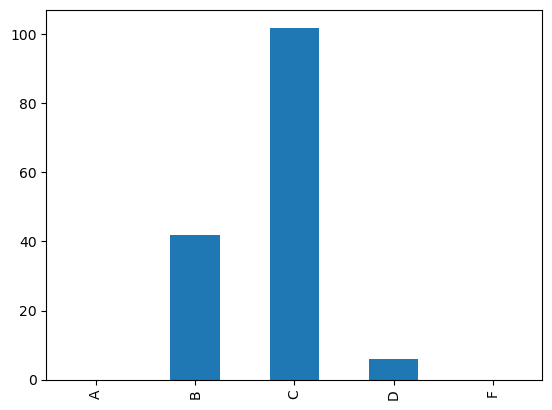

In [33]:
grade_counts.plot.bar()

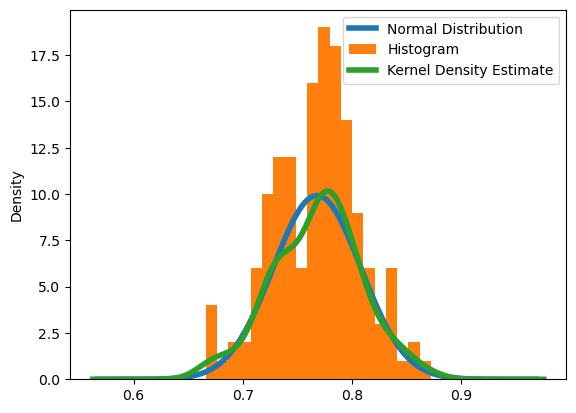

In [39]:
final_mean = final_data["Final Score"].mean()
final_std = final_data["Final Score"].std()
import scipy.stats
import matplotlib.pyplot as plt
x = np.linspace(final_mean - 5 * final_std, final_mean + 5 * final_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std)
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)


final_data["Final Score"].plot.hist(bins=20, label="Histogram")
final_data["Final Score"].plot.density(
    linewidth=4, label="Kernel Density Estimate"
)
plt.legend()